# Codsoft's Data Science Task 3
## IRIS FLOWER CLASSIFICATION

### Import necessary libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Read the dataset

In [25]:
df = pd.read_csv("flower.csv")

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Analyze the dataset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


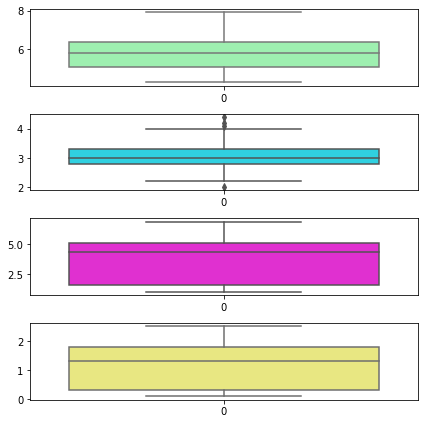

In [29]:
fig, axs = plt.subplots(4, figsize = (6,6))
plt1 = sns.boxplot(df['sepal_length'], ax = axs[0],color="#91FCA8")
plt2 = sns.boxplot(df['sepal_width'], ax = axs[1],color="#13E8FD")
plt3 = sns.boxplot(df['petal_length'], ax = axs[2],color="#FD13E8")
plt3 = sns.boxplot(df['petal_width'], ax = axs[3],color="#F9F871")
plt.tight_layout()

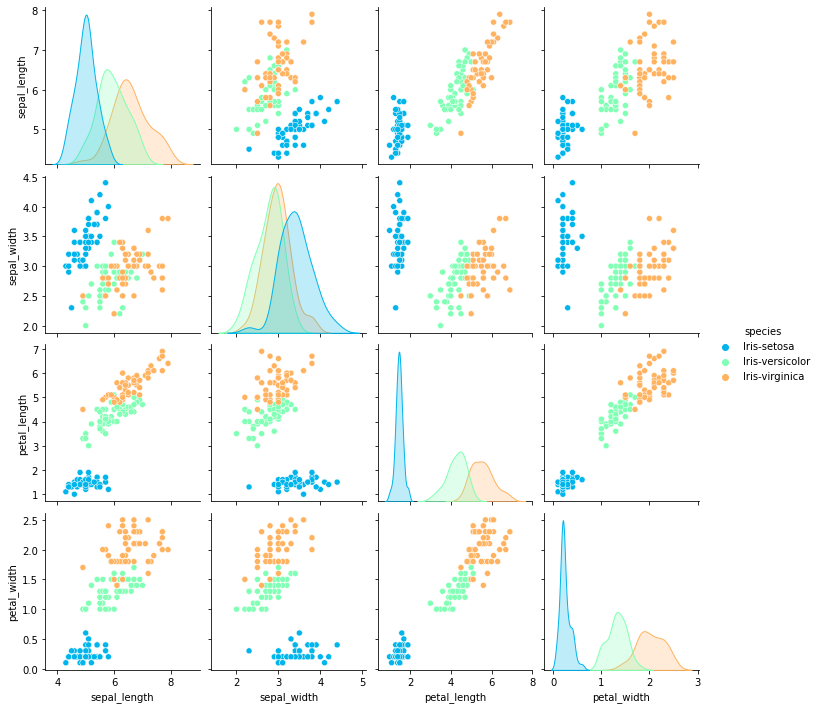

In [30]:
sns.pairplot(df,hue = "species",palette = "rainbow")

### Transform the dataset for ML Model

In [31]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [32]:
df["species"].replace({"Iris-setosa" : 0,"Iris-versicolor" : 1, "Iris-virginica" : 2},inplace = True)

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
X = df.drop('species',axis = 1)

In [35]:
y = df['species']

### Building ML Model (Logistics Regression)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [37]:
lgre = LogisticRegression()

In [38]:
lgre.fit(X_train,y_train)

LogisticRegression()

In [39]:
prediction = lgre.predict(X_test)

### Analyze the model's performance

In [40]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        23

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [41]:
confusion_matrix(y_test,prediction)

array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  0, 23]], dtype=int64)